<a href="https://colab.research.google.com/github/Kunal-Aher/Data/blob/main/ML_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
with open("Binary_data.csv","w") as f1:
  f1.write('''Student_ID,Study_Hours(per_week),Attendance(%),Passed(Yes/No),
1,10,85,Yes
2,5,60,No
3,15,90,Yes,
4,3,50,No,
5,8,70,No''')

In [ ]:
with open("Binary_data.csv","r") as f2:
  # print(f2.read())
  for i in f2:
    print(i)




Student_ID,Study_Hours(per_week),Attendance(%),Passed(Yes/No),

1,10,85,Yes

2,5,60,No

3,15,90,Yes,

4,3,50,No,

5,8,70,No


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

df=pd.read_csv("Binary_data.csv",sep=",")
df


,Student_ID,Study_Hours(per_week),Attendance(%),Passed(Yes/No),Unnamed: 4
0,1,10,85,Yes,NaN
1,2,5,60,No,NaN
2,3,15,90,Yes,NaN
3,4,3,50,No,NaN
4,5,8,70,No,NaN


In [ ]:
df.columns

Index(['Student_ID', 'Study_Hours(per_week)', 'Attendance(%)',
       'Passed(Yes/No)', 'Unnamed: 4'],
      dtype='object')

In [ ]:
df.drop(columns="Unnamed: 4",inplace=True)

In [ ]:
df

,Student_ID,Study_Hours(per_week),Attendance(%),Passed(Yes/No)
0,1,10,85,Yes
1,2,5,60,No
2,3,15,90,Yes
3,4,3,50,No
4,5,8,70,No


In [ ]:
import sklearn.preprocessing as labelEncoder

dff=df.copy()


In [ ]:
dff['Passed(Yes/No)']=labelEncoder.LabelEncoder().fit_transform(dff['Passed(Yes/No)'])

In [ ]:
dff

,Student_ID,Study_Hours(per_week),Attendance(%),Passed(Yes/No)
0,1,10,85,1
1,2,5,60,0
2,3,15,90,1
3,4,3,50,0
4,5,8,70,0


In [ ]:
x=df.drop(columns='Passed(Yes/No)')
y=df['Passed(Yes/No)']

In [ ]:
print(x)
print(y)

   Student_ID  Study_Hours(per_week)  Attendance(%)
0           1                     10             85
1           2                      5             60
2           3                     15             90
3           4                      3             50
4           5                      8             70
0    Yes
1     No
2    Yes
3     No
4     No
Name: Passed(Yes/No), dtype: object


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4, 3)
(4,)
(1, 3)
(1,)


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['No'], dtype=object)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[1]])

In [ ]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1=model1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.0

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[0, 1],
       [0, 0]])

In [ ]:
report=classification_report(y_test,y_pred1)
print(report)

              precision    recall  f1-score   support

          No       0.00      0.00      0.00       1.0
         Yes       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

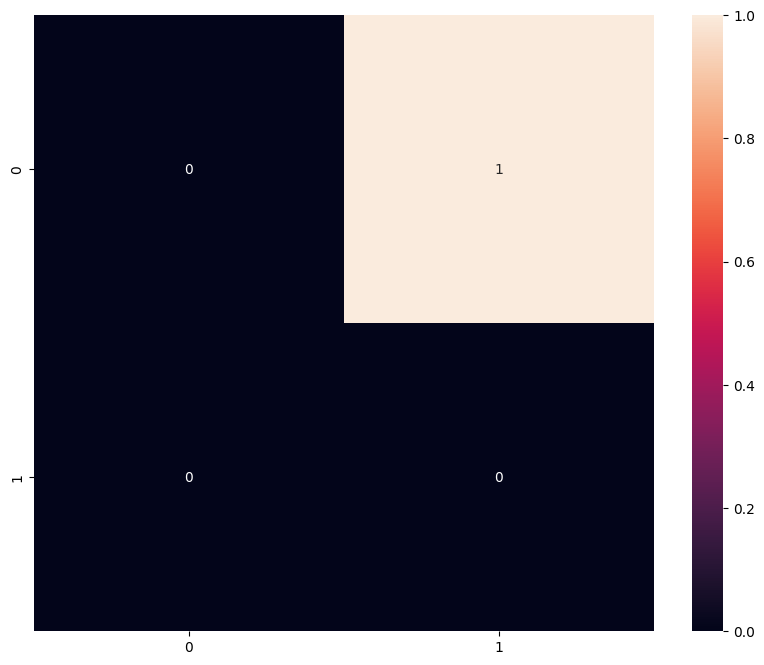

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)
plt.show()

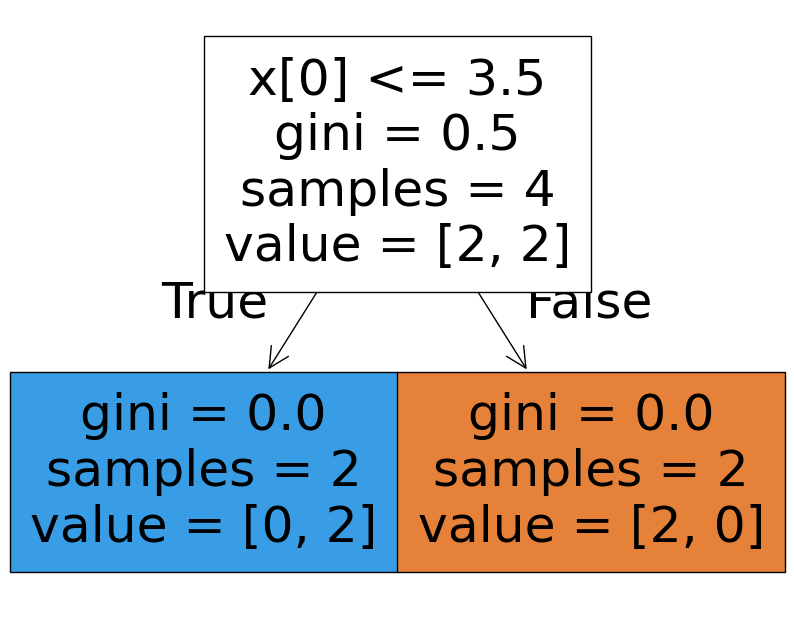

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(model1,filled=True)
plt.show()

In [ ]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# prompt: apply random forest and use entropy

model2 = RandomForestClassifier(criterion='entropy')
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
accuracy_score(y_test, y_pred2)
confusion_matrix(y_test, y_pred2)
report2 = classification_report(y_test,y_pred2)
print(report2)




              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier(criterion='entropy') instead.

<Figure size 1000x800 with 0 Axes>